In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Fertilizer Prediction.csv')
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [5]:
df.shape

(99, 9)

In [6]:
df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [23]:
{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}.keys()

dict_keys(['Soil Type', 'Crop Type', 'Fertilizer Name'])

In [45]:
pd.get_dummies(df['Fertilizer Name'])

,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
94,0,0,0,0,1,0,0
95,1,0,0,0,0,0,0
96,0,0,0,0,0,0,1
97,0,0,0,0,0,1,0


Preprocessing

In [46]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column])
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [47]:
def preprocessing_inputs(df):
    df=df.copy()
    
    #one hot encode
    for column in ['Soil Type', 'Crop Type', 'Fertilizer Name']:
        df=onehot_encode(df,column=column)
    return df


In [49]:
df1=preprocessing_inputs(df)
df1

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,Sandy,Barley,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
0,26,52,38,37,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,29,52,45,12,0,36,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,34,65,62,7,9,30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,32,62,34,22,0,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,28,54,46,35,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
95,30,60,27,4,17,17,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
96,38,72,51,39,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
97,36,60,43,15,0,41,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  99 non-null     int64
 1   Humidity     99 non-null     int64
 2   Moisture     99 non-null     int64
 3   Nitrogen     99 non-null     int64
 4   Potassium    99 non-null     int64
 5   Phosphorous  99 non-null     int64
 6   Black        99 non-null     uint8
 7   Clayey       99 non-null     uint8
 8   Loamy        99 non-null     uint8
 9   Red          99 non-null     uint8
 10  Sandy        99 non-null     uint8
 11  Barley       99 non-null     uint8
 12  Cotton       99 non-null     uint8
 13  Ground Nuts  99 non-null     uint8
 14  Maize        99 non-null     uint8
 15  Millets      99 non-null     uint8
 16  Oil seeds    99 non-null     uint8
 17  Paddy        99 non-null     uint8
 18  Pulses       99 non-null     uint8
 19  Sugarcane    99 non-null     uint8
 20  Tobacco     

In [53]:
df1.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,Sandy,Barley,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061,0.191919,0.202020,0.212121,0.191919,0.202020,0.070707,0.121212,0.070707,0.060606,0.111111,0.070707,0.101010,0.101010,0.131313,0.070707,0.090909,0.070707,0.141414,0.070707,0.141414,0.171717,0.181818,0.222222
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978,0.395814,0.403551,0.410891,0.395814,0.403551,0.257639,0.328035,0.257639,0.239821,0.315869,0.257639,0.302876,0.302876,0.339461,0.257639,0.288943,0.257639,0.350222,0.257639,0.350222,0.379054,0.387657,0.417855
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


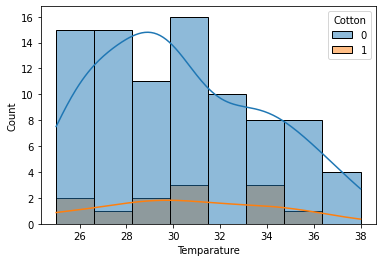

In [64]:
#EDA
sns.histplot(
    x='Temparature',hue='Cotton',data=df1,kde=True)


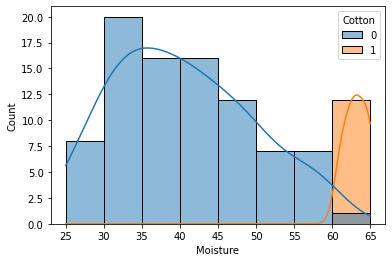

In [74]:
sns.histplot(data=df1,x='Moisture',kde=True,hue='Cotton')  # we can interpret that cotton is present where the mositure is high

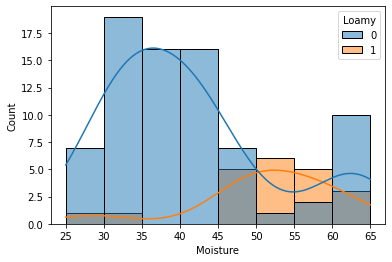

In [82]:
sns.histplot(data=df1,x='Moisture',kde=True,hue='Loamy')  #Moisture content are mostly present in Loamy type of Soil

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


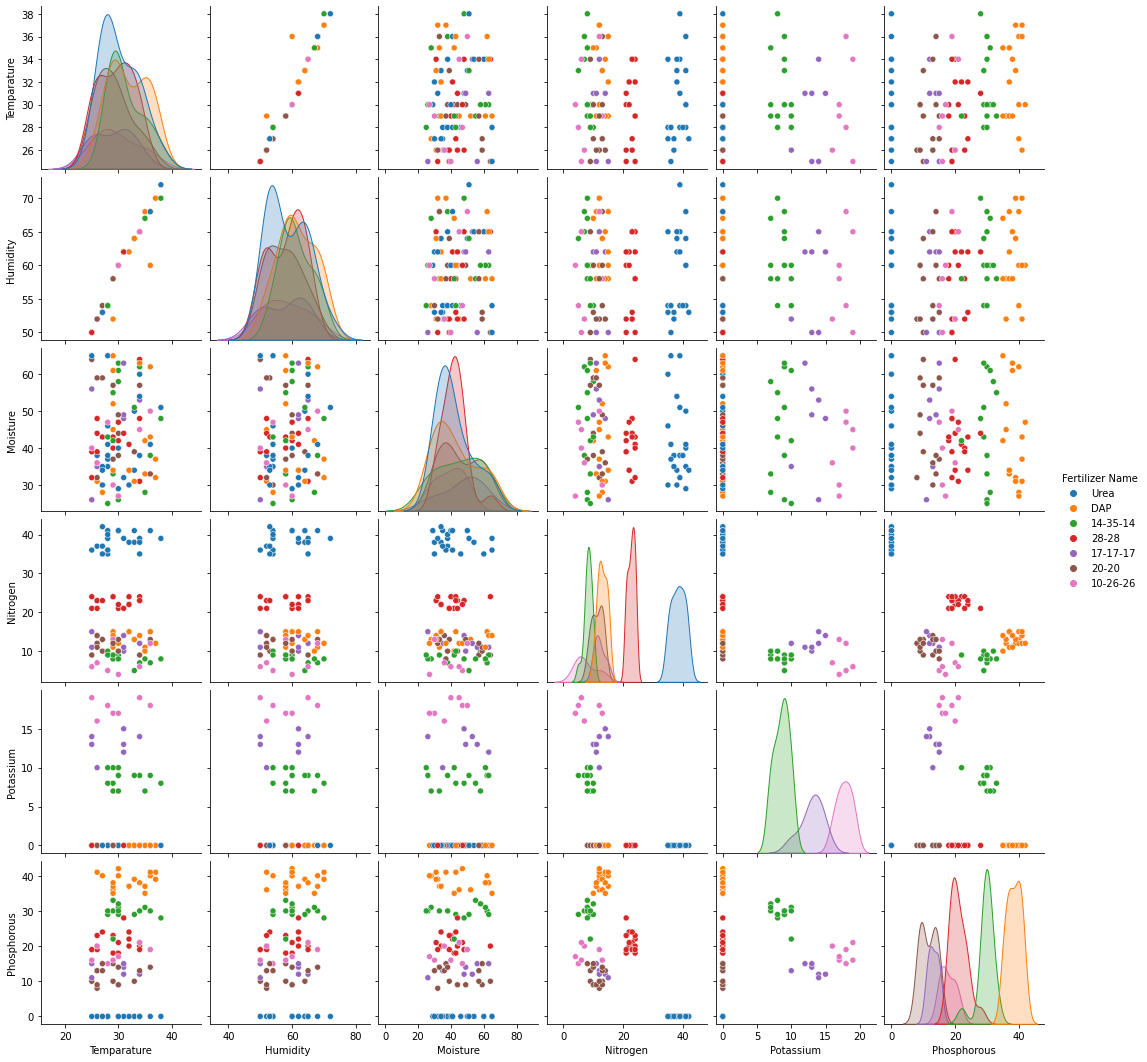

In [84]:
sns.pairplot(data=df,hue='Fertilizer Name')

In [68]:
df1.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,Sandy,Barley,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061,0.191919,0.202020,0.212121,0.191919,0.202020,0.070707,0.121212,0.070707,0.060606,0.111111,0.070707,0.101010,0.101010,0.131313,0.070707,0.090909,0.070707,0.141414,0.070707,0.141414,0.171717,0.181818,0.222222
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978,0.395814,0.403551,0.410891,0.395814,0.403551,0.257639,0.328035,0.257639,0.239821,0.315869,0.257639,0.302876,0.302876,0.339461,0.257639,0.288943,0.257639,0.350222,0.257639,0.350222,0.379054,0.387657,0.417855
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
df1.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,Sandy,Barley,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
0,26,52,38,37,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,29,52,45,12,0,36,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,34,65,62,7,9,30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,32,62,34,22,0,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,28,54,46,35,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [104]:
X = df1.iloc[:, 0:22].values
y=df1.iloc[:,-1].values  # we have selceted independer character as Urea as fetilizer type based on all above paramters



In [120]:
#Checking for Urea fertilizer will fit correctly as per crop needs on this data set which we are training based on train test split model.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]
[[19  0]
 [ 0  6]]


1.0

In [119]:
#Our model predicted correctly everytime during testing when we check the need of Urea when required for particular on which our model
#One of the reason of 100% accuracy can be of small data set.